In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.transforms.functional as tv_F
from torchvision import datasets
from torch.utils.data import DataLoader
from utils import CustomImageFolder, Prediction, ResNetModel
from tqdm import tqdm
from resnet import SL_ResModel, PreResNetModel
from torch.utils.data import random_split
import numpy as np
import os
import pathlib
import matplotlib.pylab as plt

import glob


In [2]:
data_dir = os.getcwd()+'\\Newdata'
path_dir = pathlib.Path(data_dir)
class_names = np.array([item.name for item in path_dir.glob('*')])
print(class_names)


['mild' 'moderate' 'non' 'verymild']


In [3]:
data = CustomImageFolder(data_dir, transform=None)
data = DataLoader(data, batch_size=4, shuffle=True, num_workers=0)


In [4]:
params_model = {
    "Pretrain": [False, True],
    "Model_Weight": ['best_cnn_1.pth', 'best_cnn_10.pth', 'best_cnn_20.pth', 'best_cnn_50.pth', 'best_cnn_100.pth']
}


params = {
    "mode": ['SL_without_pretrain', 'SSL_pretrain']
}


###  SL_without_pretrain

The model will be running on cuda:0 device
Load model from :  ./SL weight/best_cnn_1.pth


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

Loss : 1.951
Accuracy : 0.300
Confusion matrix, without normalization
[[0 0 1 0]
 [0 0 1 0]
 [0 0 3 1]
 [0 0 4 0]]


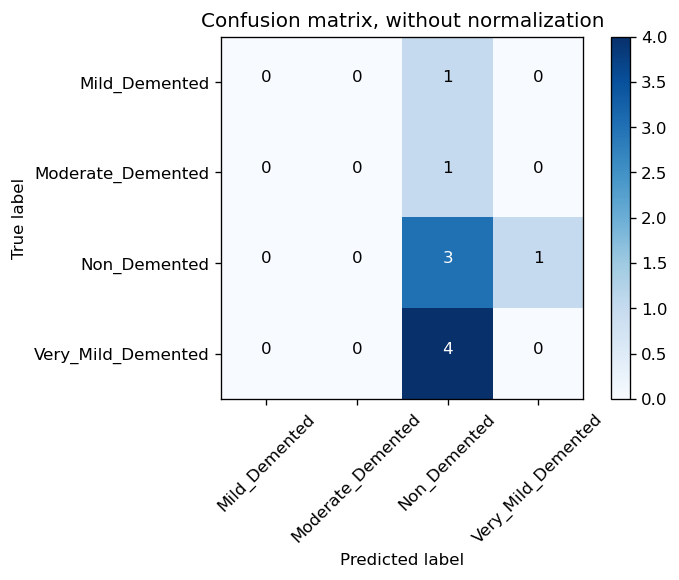

In [5]:
Prediction(data, params['mode'][0], params_model['Model_Weight'][0])


The model will be running on cuda:0 device
Load model from :  ./SL weight/best_cnn_10.pth


100%|██████████| 3/3 [00:00<00:00, 142.86it/s]

Loss : 0.763
Accuracy : 0.600
Confusion matrix, without normalization
[[1 0 0 0]
 [1 0 0 0]
 [0 0 3 1]
 [0 0 2 2]]


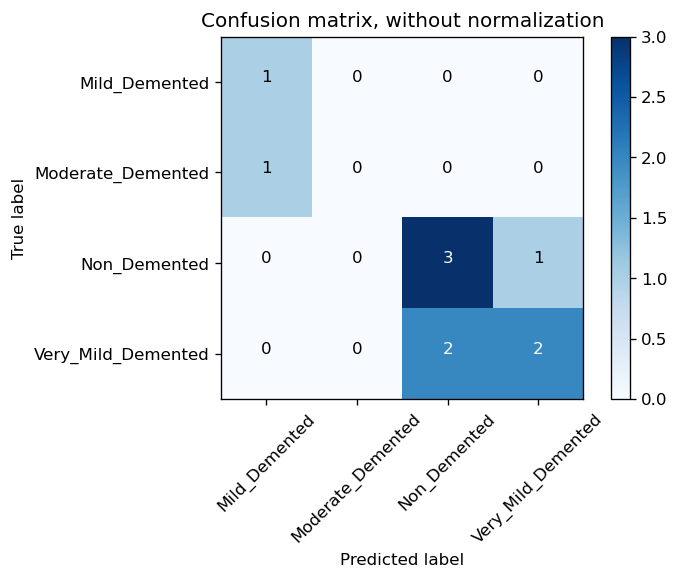

In [6]:
Prediction(data, params['mode'][0], params_model['Model_Weight'][1])


The model will be running on cuda:0 device
Load model from :  ./SL weight/best_cnn_20.pth


100%|██████████| 3/3 [00:00<00:00, 130.43it/s]

Loss : 0.589
Accuracy : 0.900
Confusion matrix, without normalization
[[1 0 0 0]
 [1 0 0 0]
 [0 0 4 0]
 [0 0 0 4]]


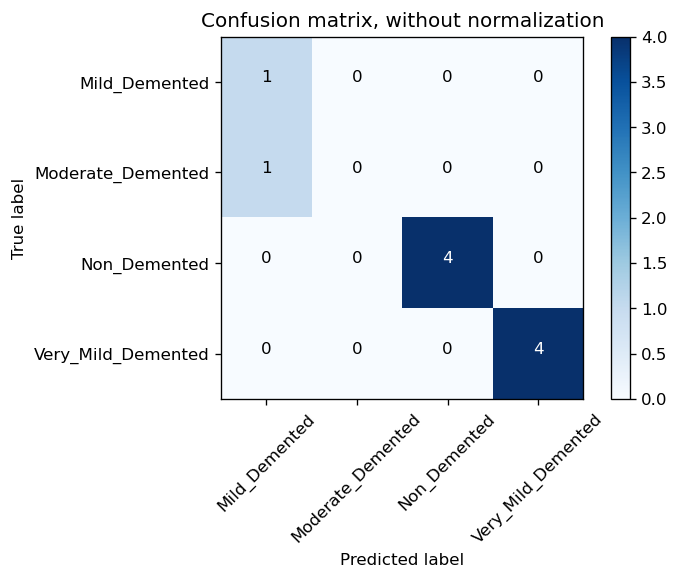

In [7]:
Prediction(data, params['mode'][0], params_model['Model_Weight'][2])


The model will be running on cuda:0 device
Load model from :  ./SL weight/best_cnn_50.pth


100%|██████████| 3/3 [00:00<00:00, 142.87it/s]

Loss : 0.129
Accuracy : 0.900
Confusion matrix, without normalization
[[1 0 0 0]
 [0 1 0 0]
 [0 0 3 1]
 [0 0 0 4]]


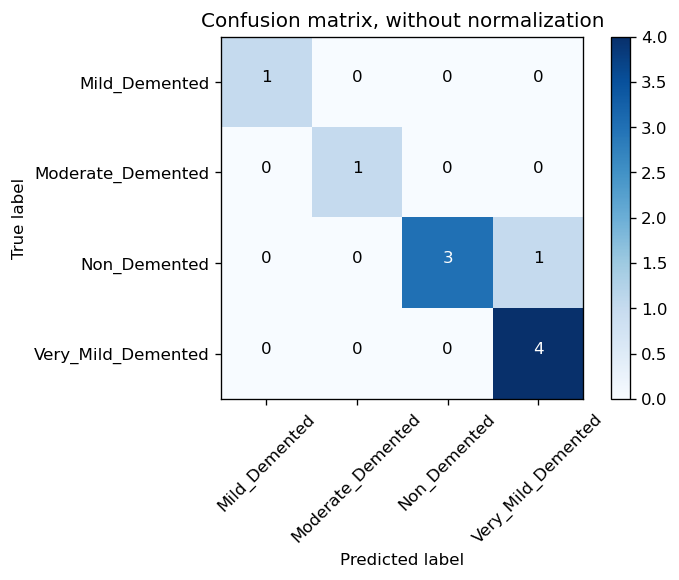

In [8]:
Prediction(data, params['mode'][0], params_model['Model_Weight'][3])


The model will be running on cuda:0 device
Load model from :  ./SL weight/best_cnn_100.pth


100%|██████████| 3/3 [00:00<00:00, 136.36it/s]

Loss : 0.003
Accuracy : 1.000
Confusion matrix, without normalization
[[1 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 4]]


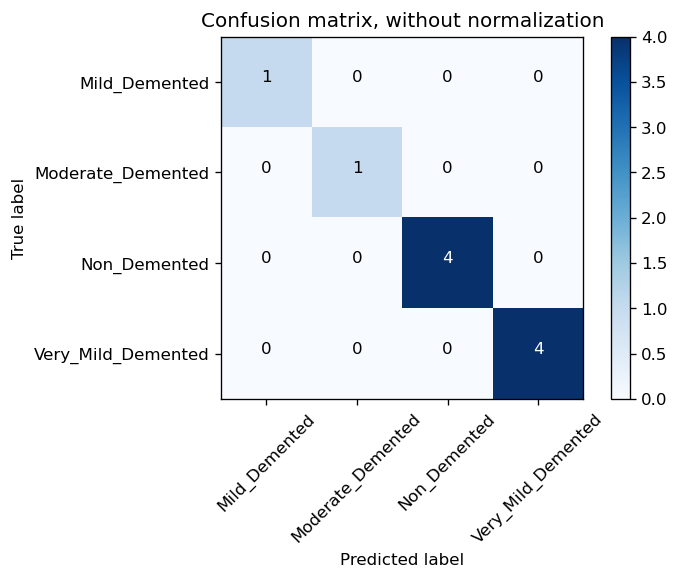

In [9]:
Prediction(data, params['mode'][0], params_model['Model_Weight'][4])


### SSL Pretrain

The model will be running on cuda:0 device
Load model from :  ./SSL model weight/best_cnn_1.pth


100%|██████████| 3/3 [00:00<00:00, 143.41it/s]

Loss : 0.468
Accuracy : 0.400
Confusion matrix, without normalization
[[0 0 1 0]
 [0 0 1 0]
 [0 0 4 0]
 [0 0 4 0]]


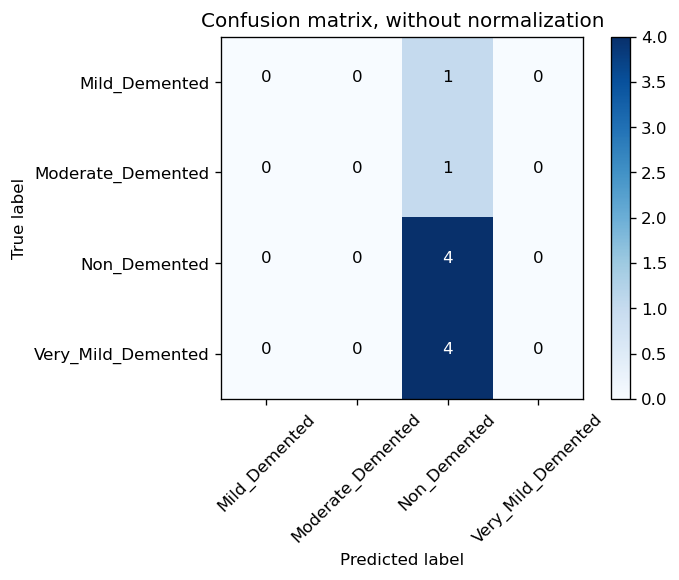

In [10]:
Prediction(data, params['mode'][1], params_model['Model_Weight'][0])


The model will be running on cuda:0 device
Load model from :  ./SSL model weight/best_cnn_10.pth


100%|██████████| 3/3 [00:00<00:00, 120.01it/s]

Loss : 0.461
Accuracy : 0.700
Confusion matrix, without normalization
[[1 0 0 0]
 [1 0 0 0]
 [0 0 3 1]
 [0 0 1 3]]


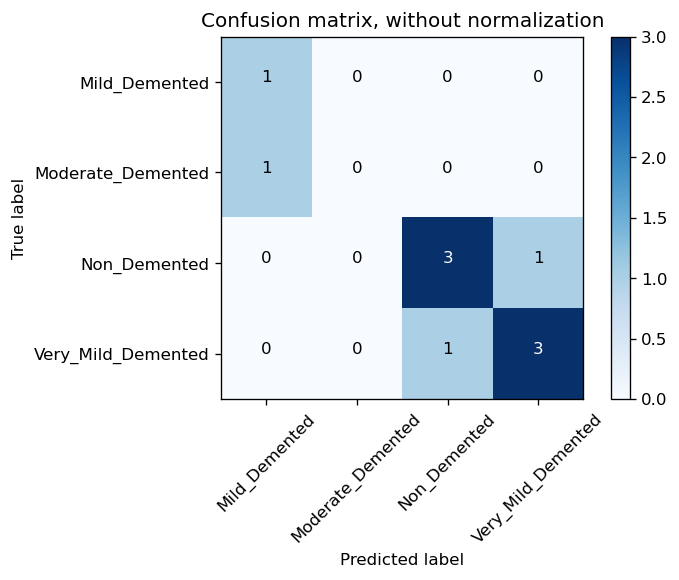

In [11]:
Prediction(data, params['mode'][1], params_model['Model_Weight'][1])


The model will be running on cuda:0 device
Load model from :  ./SSL model weight/best_cnn_20.pth


100%|██████████| 3/3 [00:00<00:00, 111.12it/s]

Loss : 0.070
Accuracy : 0.900
Confusion matrix, without normalization
[[1 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 1 3]]


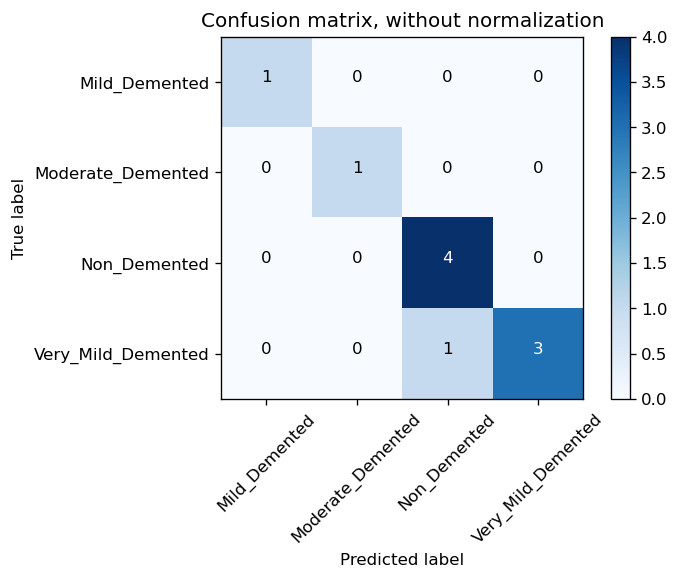

In [12]:
Prediction(data, params['mode'][1], params_model['Model_Weight'][2])


The model will be running on cuda:0 device
Load model from :  ./SSL model weight/best_cnn_50.pth


100%|██████████| 3/3 [00:00<00:00, 169.94it/s]

Loss : 0.000
Accuracy : 1.000
Confusion matrix, without normalization
[[1 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 4]]


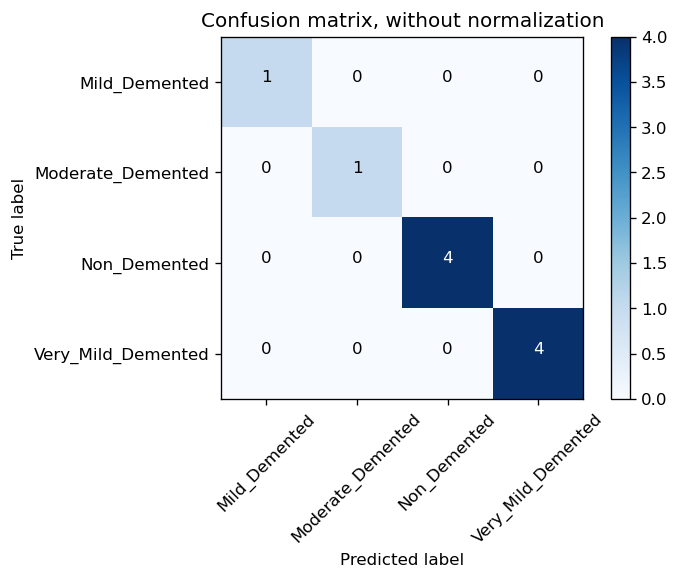

In [13]:
Prediction(data, params['mode'][1], params_model['Model_Weight'][3])


The model will be running on cuda:0 device
Load model from :  ./SSL model weight/best_cnn_100.pth


100%|██████████| 3/3 [00:00<00:00, 134.80it/s]

Loss : 0.000
Accuracy : 1.000
Confusion matrix, without normalization
[[1 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 4]]


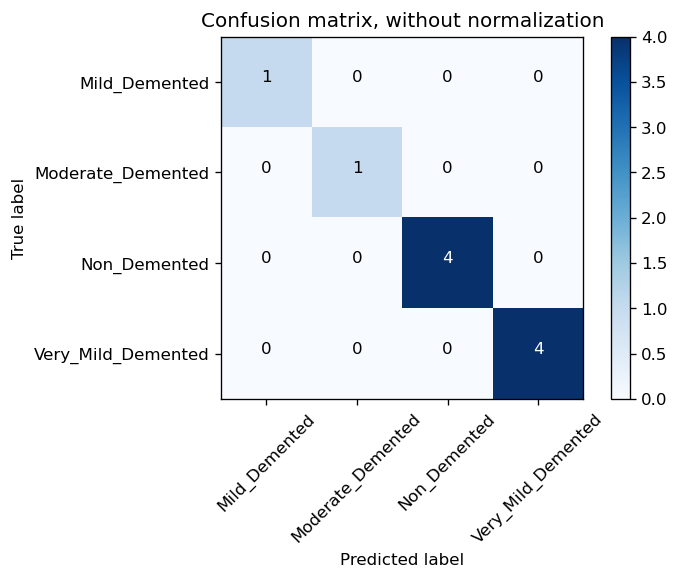

In [14]:
Prediction(data, params['mode'][1], params_model['Model_Weight'][4])


### GradCam

In [15]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2
from torchvision.transforms import Compose, ToTensor


In [16]:
def gradcam(model_type, weight_model_file):
    datapath = "newData"
    paths = [f for f in glob.glob(
        datapath + "*\*\*",
        recursive=True)]

    rgb_images = []
    input_tensors = []

    preprocessing_ = Compose([
        ToTensor(),
    ])

    for path in paths:
        rgb_img = cv2.imread(path, 1)[:, :, ::-1]
        rgb_img = np.float32(rgb_img) / 255
        rgb_images.append(rgb_img.copy())
        input_tensor = preprocessing_(rgb_img.copy()).unsqueeze(0)
        input_tensors.append(input_tensor)

    input_tensor = torch.cat(input_tensors)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    
    target_layer = None
    model = None

    if model_type == 'SL':
        weight_model_path = './SL weight/' + weight_model_file
        model = SL_ResModel('Resnet', False).to(device)  # for ssl
        model.load_state_dict(torch.load(weight_model_path))
        print("Load pre-trained model success", weight_model_file)
        target_layer = [model.pretrained.layer4[-1]]
    else:
        weight_model_path = './SSL model weight/' + weight_model_file
        
        model = PreResNetModel('resnet50 SSL', 'best_cnn.pth').to(device)  # for ssl
        model.load_state_dict(torch.load(weight_model_path))
        print("Load pre-trained model success", weight_model_file)
        target_layer = [model.pretrained.pretrained.layer4[-1]]


    cam = GradCAM(model=model, target_layers=target_layer, use_cuda=True)
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)

    plt.subplot()

    for index, (img, cam) in enumerate(zip(rgb_images, grayscale_cam)):
        visualization = show_cam_on_image(img, cam, use_rgb=True)
        cv2.imwrite('GradCam/{}.jpg'.format(index), visualization)
        plt.imshow(visualization)
        plt.show()


### SL

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_1.pth


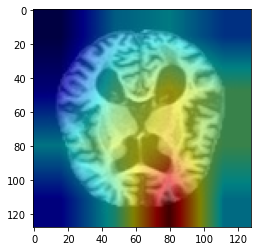

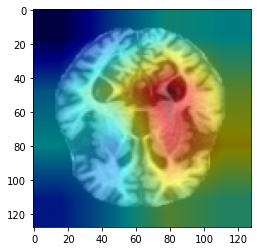

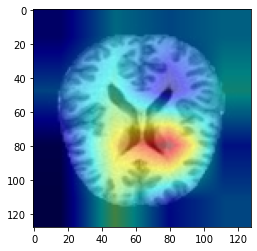

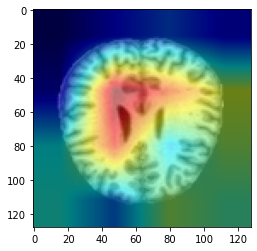

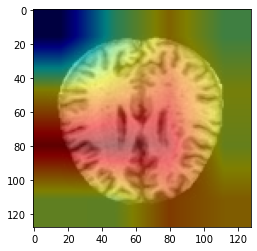

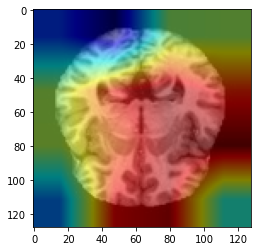

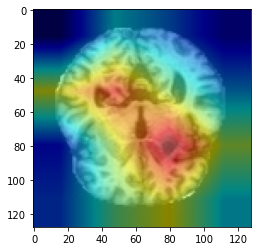

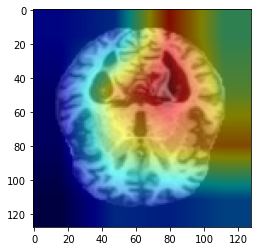

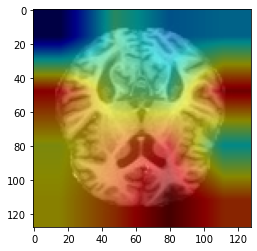

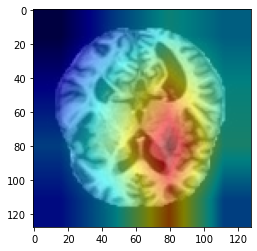

In [17]:
gradcam('SL', 'best_cnn_1.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_10.pth


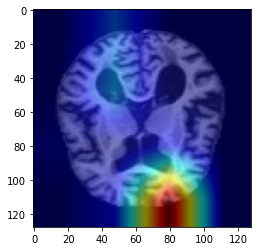

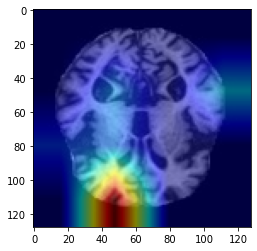

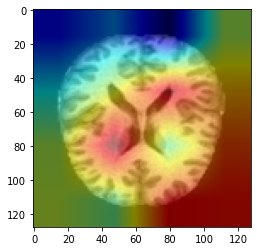

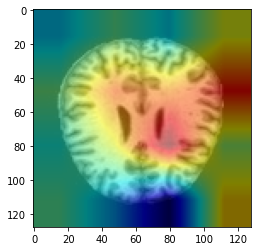

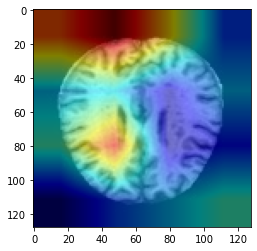

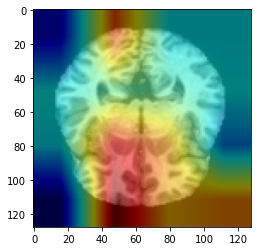

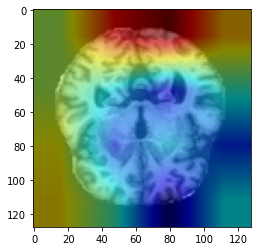

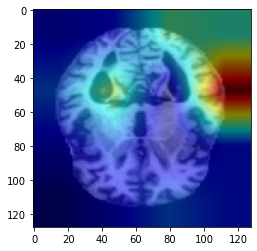

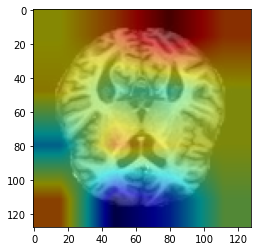

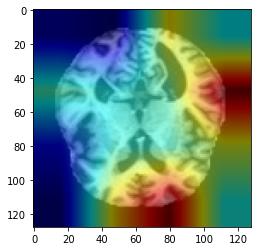

In [18]:
gradcam('SL', 'best_cnn_10.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_20.pth


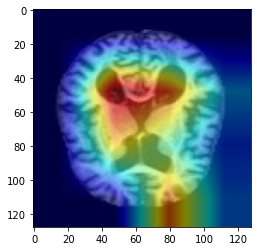

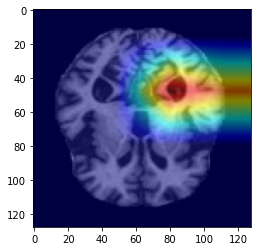

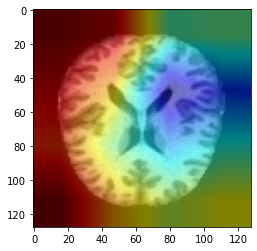

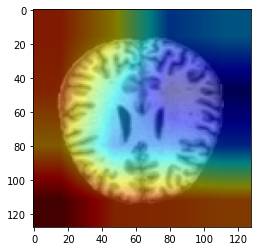

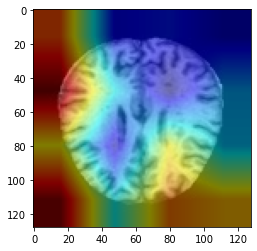

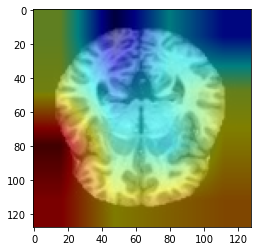

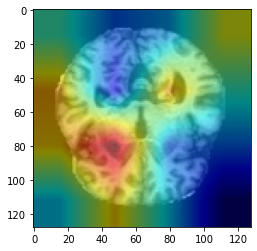

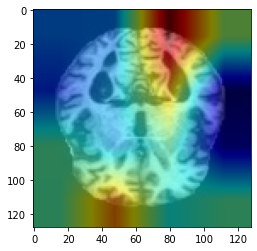

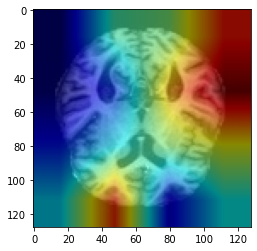

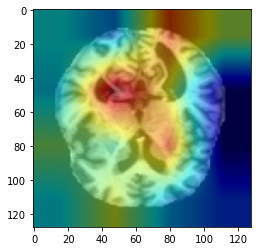

In [19]:
gradcam('SL', 'best_cnn_20.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_50.pth


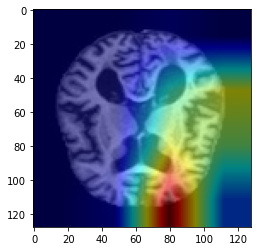

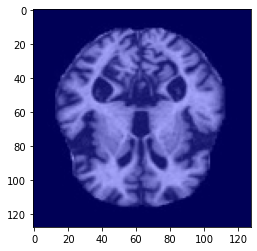

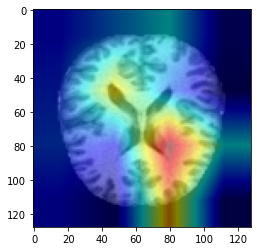

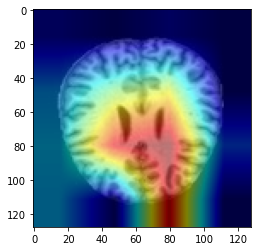

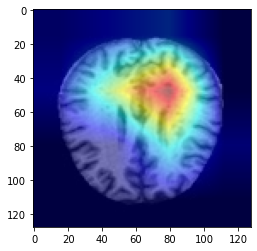

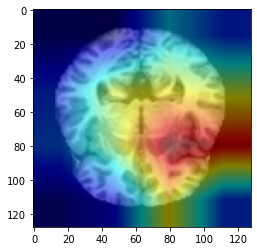

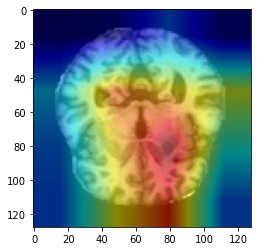

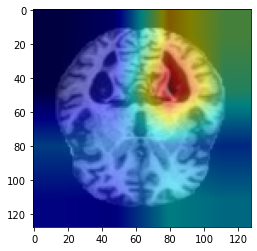

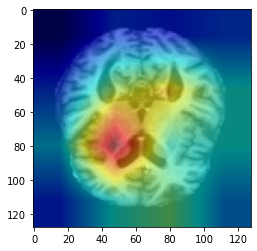

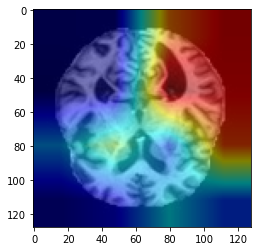

In [20]:
gradcam('SL', 'best_cnn_50.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_100.pth


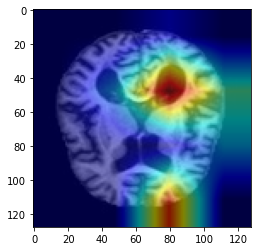

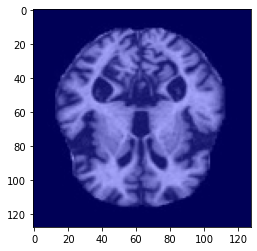

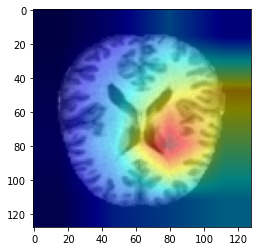

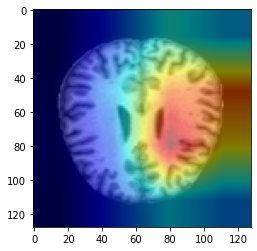

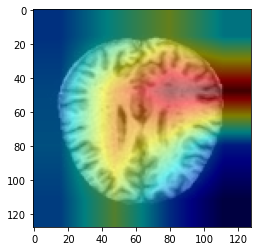

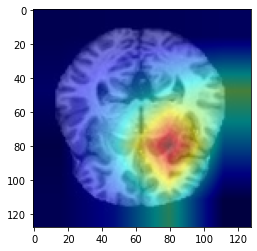

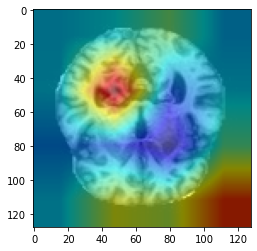

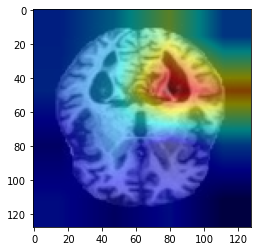

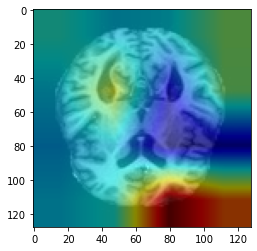

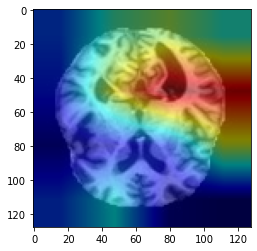

In [21]:
gradcam('SL', 'best_cnn_100.pth')

### SSL

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_1.pth


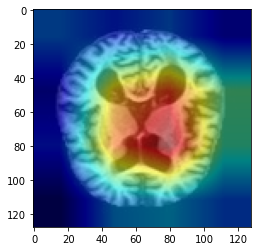

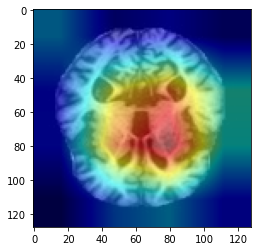

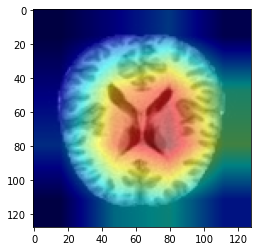

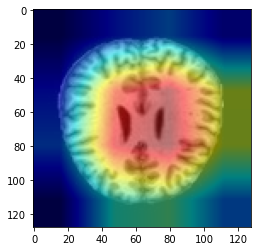

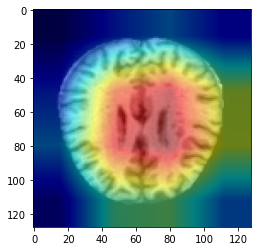

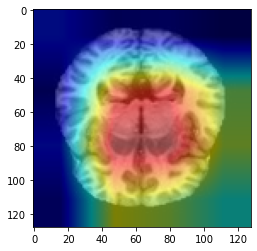

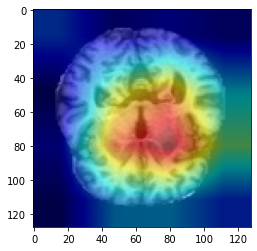

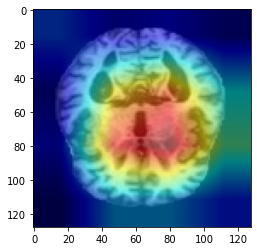

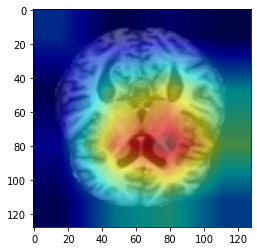

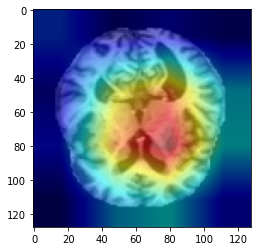

In [22]:
gradcam('SSL', 'best_cnn_1.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_10.pth


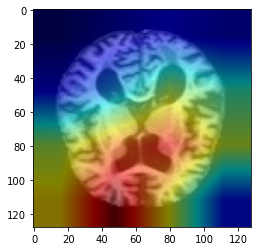

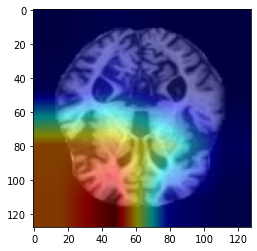

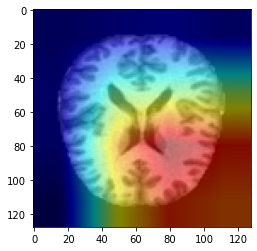

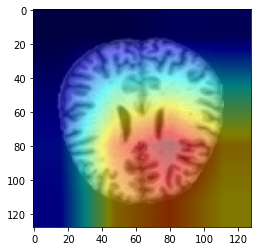

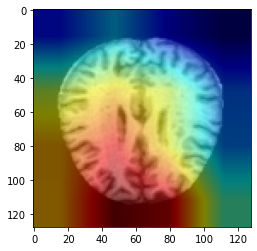

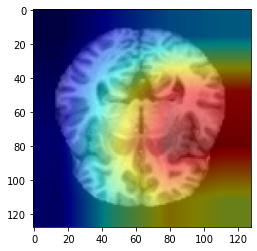

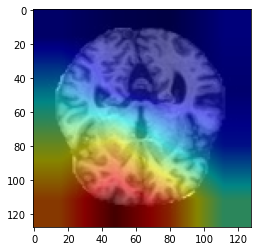

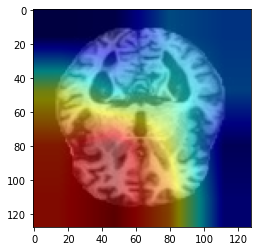

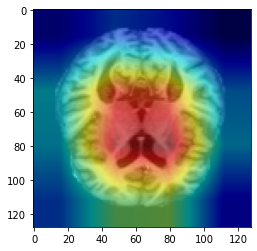

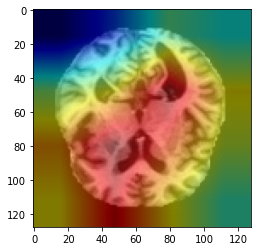

In [23]:
gradcam('SSL', 'best_cnn_10.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_20.pth


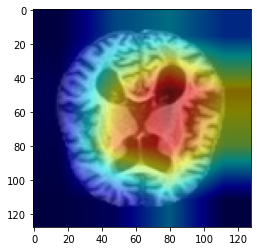

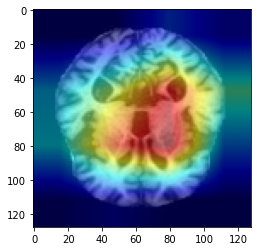

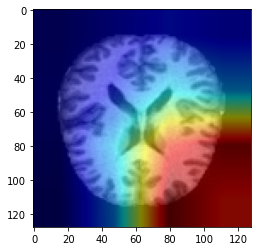

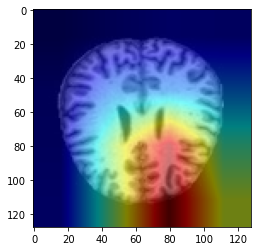

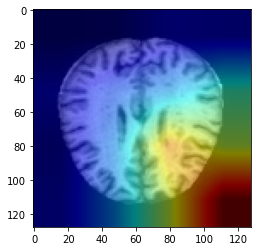

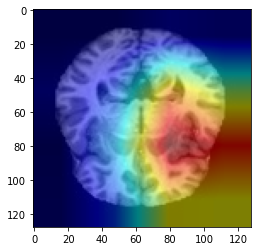

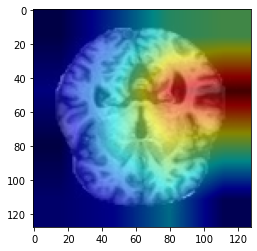

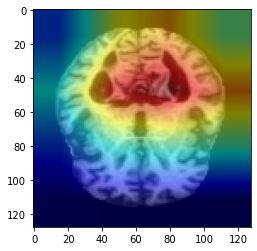

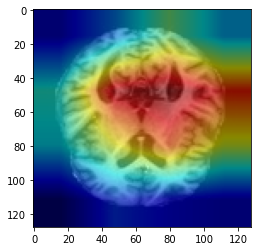

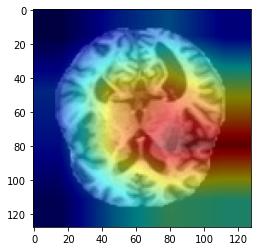

In [24]:
gradcam('SSL', 'best_cnn_20.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_50.pth


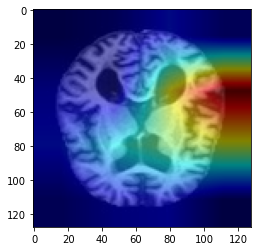

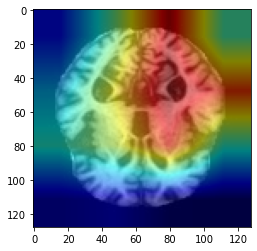

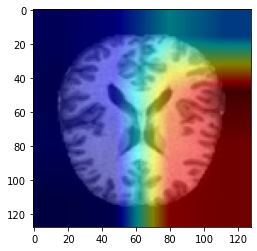

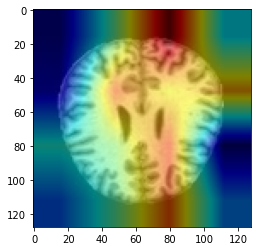

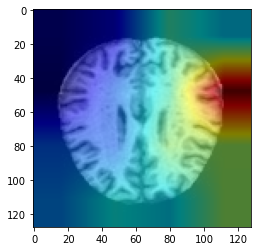

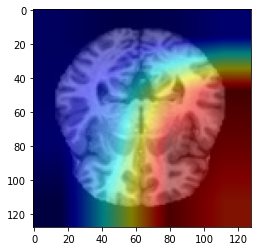

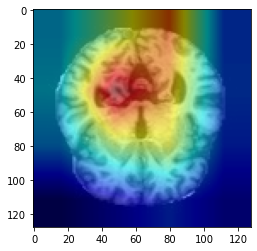

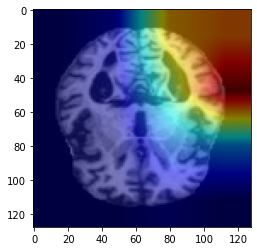

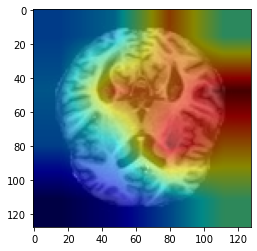

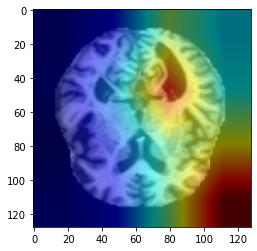

In [25]:
gradcam('SSL', 'best_cnn_50.pth')

The model will be running on cuda:0 device
Load pre-trained model success best_cnn_100.pth


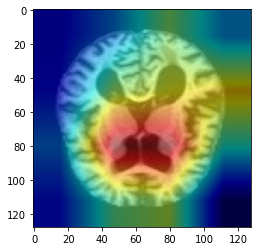

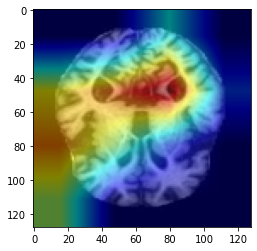

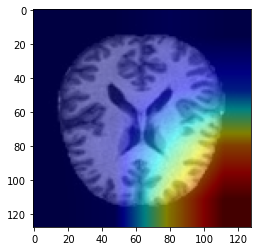

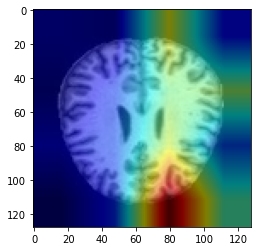

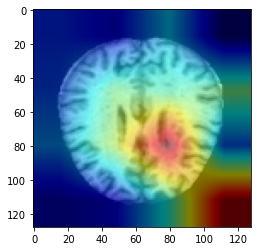

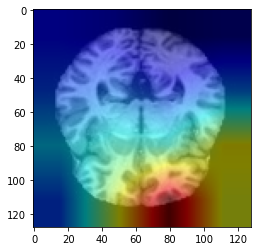

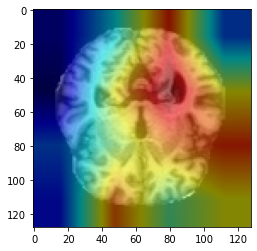

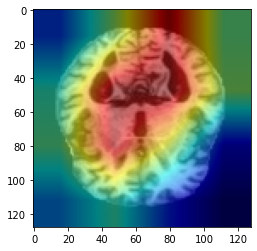

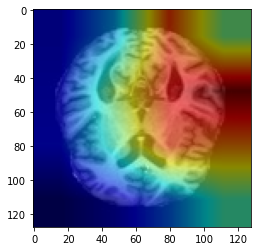

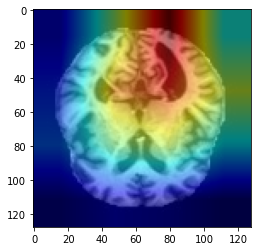

In [26]:
gradcam('SSL', 'best_cnn_100.pth')